1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

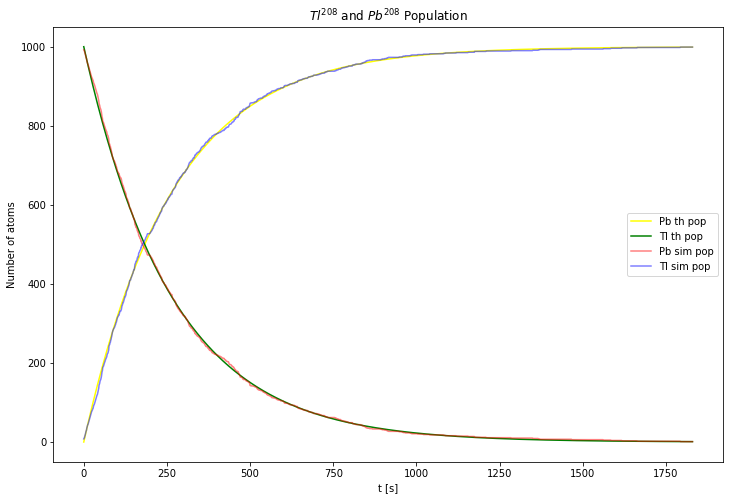

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

def random_color(): 
    return plt.cm.viridis(np.random.rand())

tau = 3.052*60 
time=int(tau*10)

def p(t): 
  return 1-2**(-t/tau)


Tl, Pb = 1000,0
pop=np.empty((time,2))
for t in range(time):
    for atom in range(Tl):
        if (np.random.random() < p(1))and(Tl>0): #decay after 1 sec
            Tl -=1
            Pb +=1
    pop[t]=[Tl, Pb]
    
x = np.arange(0,time, 1)    
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x,1000*p(x), c='yellow', label='Pb th pop')
ax.plot(x,1000*(1-p(x)),c='green', label='Tl th pop')
ax.set_title("$Tl^{208}$ and $Pb^{208}$ Population")
ax.set_xlabel('t [s]')
ax.set_ylabel('Number of atoms')

ax.plot(x,pop[:,0], color='red', alpha=0.5,label='Pb sim pop')
ax.plot(x,pop[:,1], color='blue', alpha=0.5,label='Tl sim pop')
ax.legend()


Text(0, 0.5, 'CDF')

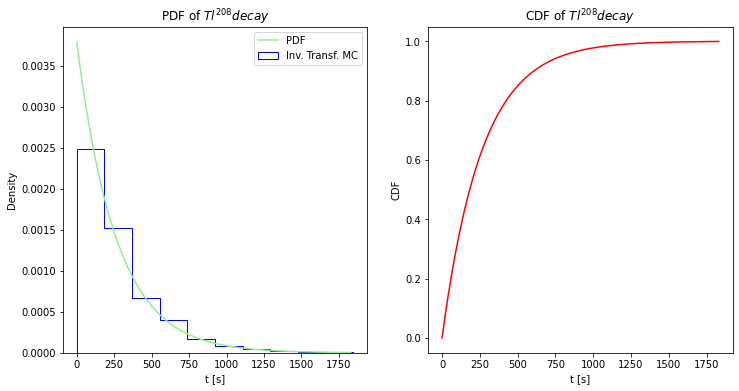

In [2]:
def pdf(t): 
  return 2**(-t/tau) * np.log(2)/tau
def cdf(t): 
  return integrate.quad(pdf,0,t)[0]
def icdf(p): 
  return tau*np.log2(1/(1-p))

u = np.random.random(1000)
decay_time = icdf(u)

fig, ax = plt.subplots(ncols=2,figsize=(12,6))
ax[0].plot(x,pdf(x), c='lightgreen',label='PDF')
ax[0].hist(decay_time, color='b', histtype='step', label="Inv. Transf. MC", density=True)
ax[0].set_title("PDF of $Tl^{208} decay$")
ax[0].set_xlabel("t [s]")
ax[0].set_ylabel("Density")
ax[0].legend()

ax[1].plot(x,[cdf(x) for x in x], c='red')
ax[1].set_title("CDF of $Tl^{208} decay$")
ax[1].set_xlabel("t [s]")
ax[1].set_ylabel("CDF")


Text(0, 0.5, 'Remaining number of Tl atoms')

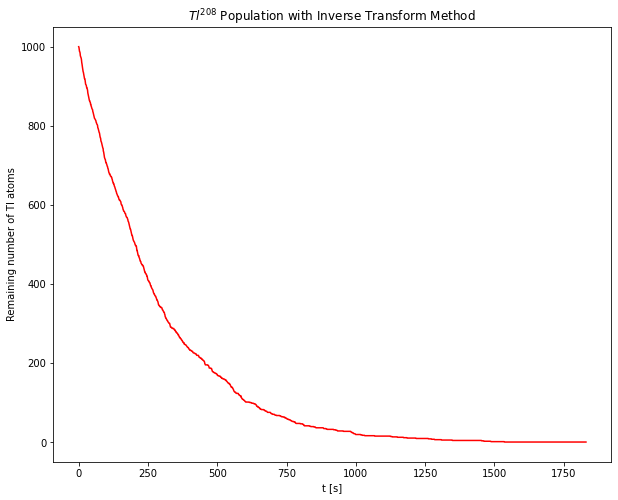

In [3]:
distrib = [len(decay_time[decay_time>i]) for i in range(time)]

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(x,distrib, c='red')
ax.set_title("$Tl^{208}$ Population with Inverse Transform Method")
ax.set_xlabel('t [s]')
ax.set_ylabel('Remaining number of Tl atoms')

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

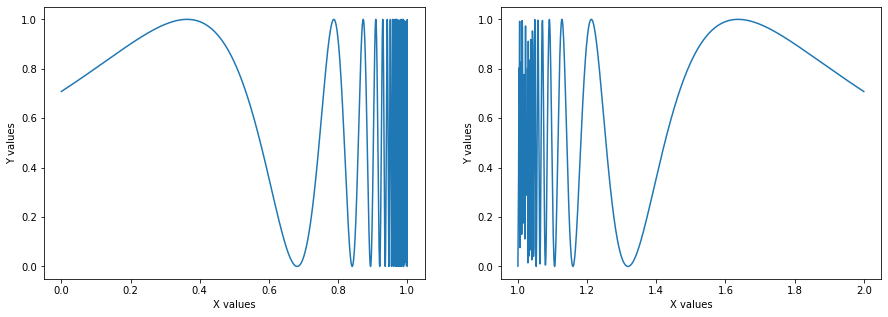

In [4]:
def g(x):
    return np.sin(1/(1-x))*np.sin(1/(1-x))

xa=np.linspace(0,0.99999,10000)
xb=np.linspace(1.00001,2,1000)


fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(xa, g(xa))
ax[0].set_xlabel('X values')
ax[0].set_ylabel('Y values')

ax[1].plot(xb, g(xb))
ax[1].set_xlabel('X values')
ax[1].set_ylabel('Y values')

plt.show()

In [5]:

#define an array of results
res=np.array([])
N = 10000 # number of generated to compute the integral
iterations=100
for j in range(iterations):
    count = 0
    for i in range(N):
        x = np.random.random()
        y = np.random.random()

        if y < g(x): count += 1
    I=2*count/N
    res=np.append(res,I)
    #print("Integral:", I)

print(f"The integral : {np.mean(res)} +- {np.std(res)/np.sqrt(iterations)}")



p=1000

x=np.linspace(0,0.99999,10000)
values=g(x)
mean=np.mean(values)
print("Mean", mean)

print("The integral between [0-2] ", 2*mean, " +- ", np.std(values)/np.sqrt(p))

print("Compatibility: ", np.abs(np.mean(res)-2*mean)/(np.std(res)**2/iterations+np.std(values)/p))

The integral : 1.3451340000000003 +- 0.0009149778357971311
Mean 0.6731921963345148
The integral between [0-2]  1.3463843926690295  +-  0.010335221823544093
Compatibility:  3.816063349294757


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

The area of the circle with Monte Carlo method is: 3.142 +- 0.017
The volume of the hypersphere 10D with Monte Carlo method is: 2.552 +- 0.517


Text(0.5, 1.0, 'Circle with Monte Carlo')

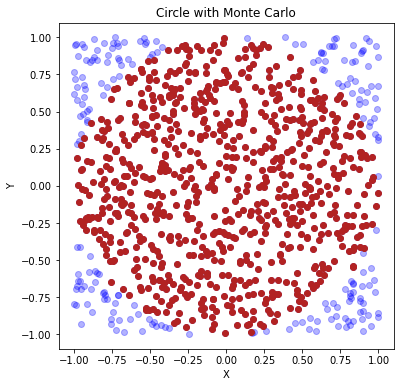

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la


def vol_sphere(N,dim,n_iter):    
    V=2**dim
    vol=[]
    for i in range(n_iter):
        x = np.random.uniform(-1,1,(N,dim))
        f = la.norm(x, axis=1)**2
        vol.append( V/N * len(f[f<1]))
    return [np.mean(vol), np.std(vol)]


circle = vol_sphere(10000, 2, 1000)
print('The area of the circle with Monte Carlo method is: %.3f +- %.3f'%(circle[0], circle[1]))

sphere10D = vol_sphere(10000, 10, 1000)
print('The volume of the hypersphere 10D with Monte Carlo method is: %.3f +- %.3f'%(sphere10D[0], sphere10D[1]))


#Plotting the circle
points = np.random.uniform(-1,1,(1000,2))
circle_point = points[la.norm(points, axis=1)**2<1]

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(points.T[0],points.T[1], alpha=0.3,color='blue')
ax.scatter(circle_point.T[0],circle_point.T[1],color='firebrick')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Circle with Monte Carlo')


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.


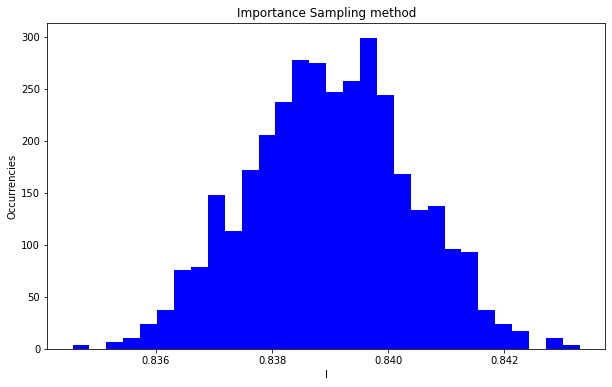

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate


def f(x): 
  return 1/np.sqrt(x)/(np.exp(x)+1)
def w(x): 
  return 1/np.sqrt(x)


def imp_samp(f,w,N,a,b): 
    u = np.random.uniform(a,b,N)
    x = (u)**2
    return np.mean(f(x)/w(x))*integrate.quad(w,a,b)[0]


n_iter=1000
I = [imp_samp(f,w,10000,0,1) for i in range(n_iter)]



def distrb_hist(ax,x,xlabel,ylabel,title):
    h, bins, _ = ax.hist(x, bins=30, color='B', density=True)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    return ax

fig, ax = plt.subplots(figsize=(10, 6))
distrb_hist(ax,I,'I',"Occurrencies","Importance Sampling method")
